In [527]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk
import statsmodels.api as sm
import string

# Unit 4 Capstone: Poetry

Our data was taken from https://www.kaggle.com/ultrajack/modern-renaissance-poetry. Our collection of poetry is separated into 3 catergories based on the type of poem, Mythology & Folklore, Nature, and Love. Additionally our data is also separated into 2 catergories based on their time period, Renaissance and Modern. Using the information given to us and some supervised and unsupervised learning techniques we are going to try and find out more about these poems and see if we can predict which catergory each poem should be placed using our own grouping methods.

In [528]:
df = pd.read_csv('all.csv')

In [529]:
df.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\nA...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore


In [530]:
df.columns

Index(['author', 'content', 'poem name', 'age', 'type'], dtype='object')

In [531]:
df.type.unique()

array(['Mythology & Folklore', 'Nature', 'Love'], dtype=object)

In [532]:
df.author.unique()

array(['WILLIAM SHAKESPEARE', 'DUCHESS OF NEWCASTLE MARGARET CAVENDISH',
       'THOMAS BASTARD', 'EDMUND SPENSER', 'RICHARD BARNFIELD',
       'SIR WALTER RALEGH', 'QUEEN ELIZABETH I', 'JOHN DONNE',
       'JOHN SKELTON', 'CHRISTOPHER MARLOWE', 'LADY MARY WROTH',
       'ROBERT SOUTHWELL, SJ', 'WILLIAM BYRD', 'GEORGE GASCOIGNE',
       'HENRY VIII, KING OF ENGLAND', 'SIR THOMAS WYATT', 'EN JONSON',
       'ORLANDO GIBBONS', 'THOMAS NASHE', 'SIR PHILIP SIDNEY',
       'SECOND BARON VAUX OF HARROWDEN THOMAS, LORD VAUX',
       'HENRY HOWARD, EARL OF SURREY', 'GEORGE CHAPMAN', 'THOMAS CAMPION',
       'ISABELLA WHITNEY', 'SAMUEL DANIEL', 'THOMAS HEYWOOD',
       'GIOVANNI BATTISTA GUARINI', 'SIR EDWARD DYER', 'THOMAS LODGE',
       'JOHN FLETCHER', 'EDGAR LEE MASTERS', 'WILLIAM BUTLER YEATS',
       'FORD MADOX FORD', 'IVOR GURNEY', 'CARL SANDBURG', 'EZRA POUND',
       'ELINOR WYLIE', 'GEORGE SANTAYANA', 'LOUISE BOGAN',
       'KENNETH SLESSOR', 'HART CRANE', 'D. H. LAWRENCE',
       'H

In [533]:
df.age.unique()

array(['Renaissance', 'Modern'], dtype=object)

In [534]:
poetry=df.content.values


In [535]:
df['type2'] = df.type.apply(lambda x: 1 if x =='Mythology & Folklore'  else( 2 if x=='Nature' else( 3)))
#Converting our Given types into integers

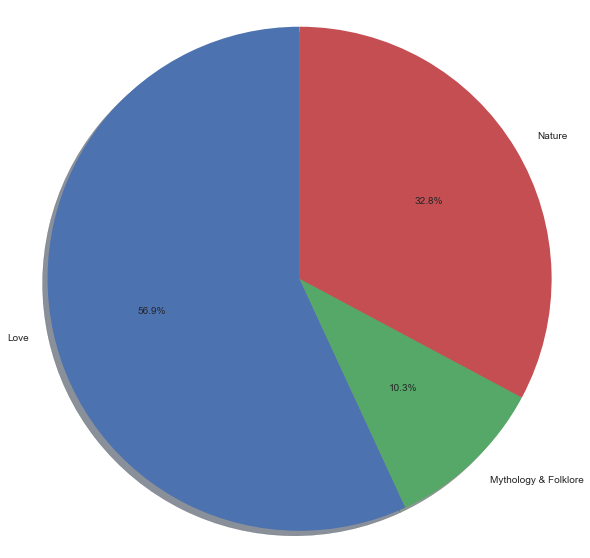

In [536]:
labels = 'Love', 'Mythology & Folklore', 'Nature'
sizes = [326, 59, 188]
 

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [537]:
df['age2'] = df.age.apply(lambda x: 1 if x =='Renaissance' else(2)) #Converting our ages into integers

In [538]:
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = x.replace('\r','')
    x = x.replace('\n','')
    x = x.replace('  ','')
    x = x.replace('\'','')
    return re.sub("["+string.punctuation+"]", " ", x)

In [539]:
poetry = pd.Series(removePunctuation(x) for x in df['content'])
poetry

0      let the bird of loudest layon the sole arabian...
1      sir charles into my chamber coming in when i w...
2      our vice runs beyond all that old men saw and ...
3      lo i the man  whose muse whilome did maske as ...
4      long have i longd to see my love againe still ...
5      cherry lipt adonis in his snowie shape might n...
6      praisd be dianas fair and harmless light prais...
7      when i was fair and young  then favor graced m...
8      when by thy scorn  o murdress  i am dead and t...
9      pla ce bo who is there  who di le xi dame marg...
10     ye learned sisters which have oftentimesbeene ...
11     on hellespont  guilty of true loves blood in v...
12     by that he ended had his ghostly sermon the fo...
13     calm was the day  and through the trembling ai...
14     thenot hobbinolltell me good hobbinoll  what g...
15     pierce   cuddiecuddie  for shame hold up thy h...
16     go and catch a falling star get with child a m...
17     orpheus with his lute ma

In [682]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = [u'published', u'publisher', u'publishing', u'thy', u'thou', u'shall', u'like', u'thee', u'doth', u'did', u'let',\
                u'copyright', u'reprinted', u'oh',u'marc',u'simon',u'cummings',u'maybe',u'permission',u'poems',u'rights',u'books',u'harpercollins',u'edited',u'originally'
               ,u'selected',u'publishers'] #unicode is used in nltk.corpus.stopwords 
stopwords.extend(newStopWords)  

In [683]:
print (stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [684]:
#df['author'].apply(lambda x: x.split())
authors =set()
for i in df['author']: 
    #print(i.split())
    for j in i.split():
        authors.add(j.lower())

In [573]:
print (authors)

{'battista', 'skelton', 'chapman', 'gertrude', 'paul', 'stephen', 'elinor', 'archibald', 'cavendish', 'robert', 'dyer', 'wallace', 'guarini', 'cummings', 'nashe', 'fearing', 'madox', 'ivor', 'lee', 'heywood', 'lady', 'edward', 'dunbar', 'moore', 'aldington', 'slessor', 'surrey', 'george', 'en', 'mary', 'michael', 'edith', 'hart', 'baron', 'e.', 'margaret', 'john', 'pound', 'eliot', 'wroth', 'richard', 'sj', 'stevens', 'stein', 'kenneth', 'fletcher', 'gurney', 'ford', 'of', 'southwell,', 'samuel', 'macleish', 'joyce', 'second', 'bastard', 'bunting', 'henry', 'cowley', 'whitney', 'teasdale', 'd.', 'jonson', 'newcastle', 'gibbons', 'hugh', 'katherine', 'lord', 'daniel', 'spenser', 'h.', 'james', 'thomas,', 'marlowe', 'elizabeth', 'apollinaire', 'wyatt', 'carl', 'crane', 'greenberg', 'anania', 'campion', 'sitwell', 'england', 'pickthall', 'marianne', 'asil', 'loy', 'marjorie', 'howard,', 'isabella', 'spender', 'sidney', 'masters', 'thomas', 'untermeyer', 'gascoigne', 'giovanni', 'william',

In [685]:
stops = set(stopwords)
def removeStopwords(X):
    filtered_words = [word for word in X.lower().split() if word not in stops and word not in newStopWords and word not in authors and word.isalpha()] 
    return " ".join(filtered_words)

In [686]:
poetry = pd.Series(removeStopwords(X) for X in df['content'])

We have cleaned our data seperating it by time period, type, and by removing punctuation and stop words. From this we can move on to some unsupervised learning. 

## Separating And Training Our Data

In [687]:
X_train, X_test = train_test_split(poetry, test_size=0.4, random_state=0)

In [688]:
y_train, y_test = train_test_split(df['type2'], test_size=0.4, random_state=0)

In [634]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [689]:
tfidf =TfidfVectorizer(max_df=0.5, 
                             min_df=2, 
                             stop_words='english', 
                             lowercase=True, 
                             use_idf=True,
                             norm=u'l2', 
                             smooth_idf=True 
                            )

In [690]:
tfidf= tfidf.fit(poetry) 


In [691]:
X = tfidf.transform(poetry)
print("Number of features: %d" % X.get_shape()[1])

Number of features: 4085


In [692]:
X_train_tfidf, X_test_tfidf= train_test_split(X, test_size=0.4, random_state=0)

In [693]:
X = X.toarray()

In [694]:
X_train_tfidf_csr = X_train_tfidf.tocsr()

In [798]:
X_train_tfidf_csr

<343x4085 sparse matrix of type '<class 'numpy.float64'>'
	with 13131 stored elements in Compressed Sparse Row format>

In [695]:
y = df['type']

In [696]:
n = X_train_tfidf_csr.shape[0]
n

343

In [697]:
terms = tfidf.get_feature_names()

In [698]:
tfidf_bypara = [{} for _ in range(0,n)]
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence: adonis snowie might compare pure ivorie whose faire front poets pen may whose roseate red excels crimson delicate soft rarely framd tintrap poore gazine lillie carnation lovely tincture apollos lips ripe strawberries nectar mouth tongue muses make teeth pure pearle blushing correll body slow quicke
Tf_idf vector: {'barren': 0.28375020193876971, 'best': 0.18636491358578011, 'cutting': 0.27313781973542567, 'enjoy': 0.50157026375070657, 'hath': 0.13260659186435986, 'jove': 0.24518354229728131, 'kind': 0.21221847223386495, 'love': 0.19928304360188689, 'plant': 0.29743194218144192, 'sickness': 0.28375020193876971, 'sighing': 0.25713569036709671, 'tempest': 0.28375020193876971, 'torment': 0.28375020193876971}


## Unsupervised Learning

In [83]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [699]:
svd= TruncatedSVD(590)

In [700]:
lsa = make_pipeline(svd, Normalizer(copy=False))

In [701]:
X_train_lsa = lsa.fit_transform(X_train_tfidf)

In [702]:
variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 100.0


In [703]:

paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Component 0:
came holy land walsinghame met true love way know true love met many one went holy land neither white brown heavens fair none hath form divine earth one good angelic appear hath left alone sometimes lead loved whats cause leaves alone new way loved joy loved love likes falling fruit withered know love careless child forgets promise deaf list faith never desire dureless content trustless joy world despair lost womenkind indeed love word love abused many childish desires conceits true love durable fire mind ever never never never never                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Name: 0, dtype: float64
Component 1:
cantos new directions                                 0.833268
cantos new directions                                 0.833268
cantos new directions                                 0.833268
cantos new directions                                 0.833268
cantos new directions                                 0.833268
eemis stane alan riach new directions                 0.755211
stony limits alan riach new directions                0.755211
sauchs reuch heuch hauch alan riach new directions    0.755211
gairmscoile alan riach new directions                 0.656386
excerpt raised beach alan riach new directions        0.597680
Name: 1, dtype: float64
Component 2:
carib complete liveright used liveright               0.749019
complete liveright used liveright                     0.749019
complete liveright used liveright                     0.749019
air complete liveright used                           0.738575
stratagem used asphodel                     

Name: 4, dtype: float64


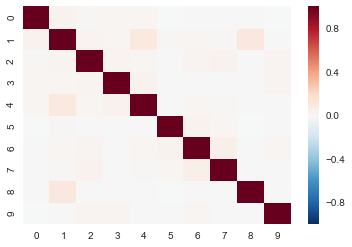

Key:
0 words good indian allow small cutted spartans mean tender ears questions total demand phoenix left well think satisfies would know whether sit waited often pastime journey lips sweeten poor say well still say
1 since coming holy choir saints made come tune instrument must think whilst physicians love grown lie flat may shown per fretum straits straits see though currents yield return west hurt west east flat maps death touch pacific sea eastern none ways whether japhet think paradise stood one find adams met first sweat surrounds may last blood soul purple receive give souls sermon mine may throws
2 lily hand rosy cheek lies cozening pillow lawful therefore seems part swelling either side want whose hills head entombed virtuous monument admired lewd unhallowed without bed fair hand green whose perfect white showed april daisy pearly sweat resembling dew sheathed canopied darkness sweetly lay till might open adorn hair golden threads played breath modest wanton showing lifes triu

In [676]:

similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


All 10 sentences seem to (however small) positively correlated to each other which means our grouping mechanisms make sense.

In [564]:

from sklearn.decomposition import NMF, LatentDirichletAllocation as LDA

In [704]:
n_samples = 2000
n_features = 1000
n_components = 3
n_top_words = 40

In [705]:
lda = LDA(3, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [706]:
def print_topics(model, vectorizer, top_n=20):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        print("=" * 100)

In [707]:

lda.fit(X)

print("LDA Model:")
print_topics(lda, tfidf)


LDA Model:
Topic 0:
[('used', 9.527451424733087), ('march', 5.81813007795252), ('asphodel', 5.4832133158199312), ('straus', 3.1020975422041777), ('blue', 2.788007577342452), ('motet', 2.0555855384294603), ('song', 1.9511169690682084), ('university', 1.6359534557072961), ('magic', 1.5079395032220726), ('act', 1.3978012330803635), ('division', 1.2808375807392911), ('ghosts', 1.2757464296661796), ('importune', 1.2510708038835134), ('cover', 1.2043643943501539), ('kent', 1.1341434622751803), ('penguin', 1.1175584313196394), ('wanted', 1.0974638592039871), ('river', 1.0835392323543795), ('doubleday', 1.0651953904787361), ('state', 1.0132217454437427)]
Topic 1:
[('new', 6.3563714458170297), ('directions', 6.1678783052153969), ('cantos', 4.4604544086140852), ('riach', 2.9030048664783283), ('alan', 2.8903016862971627), ('collected', 2.3006562554072185), ('december', 2.034738361117701), ('random', 1.909845873777938), ('jubal', 1.8863160632771945), ('russell', 1.8502529434930226), ('agents', 1.8

In [708]:
lda.transform(X)

array([[ 0.03694519,  0.03676761,  0.9262872 ],
       [ 0.07150372,  0.07172553,  0.85677074],
       [ 0.08073528,  0.0882941 ,  0.83097062],
       ..., 
       [ 0.06019874,  0.05990295,  0.87989831],
       [ 0.05424984,  0.05427565,  0.89147452],
       [ 0.05674746,  0.0570092 ,  0.88624335]])

In [713]:
# we can try other models for topic modelling 
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
 
NUM_TOPICS = 3
 
vectorizer = CountVectorizer(min_df=3, max_df=0.9, 
                             stop_words='english', lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(poetry)
 
# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_topics=NUM_TOPICS, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=NUM_TOPICS)
nmf_Z = nmf_model.fit_transform(data_vectorized)
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)
 
 

print(lda_Z[0])
print(nmf_Z[0])
print(lsi_Z[0])
 

(573, 3)
(573, 3)
(573, 3)
[ 0.00426667  0.00454013  0.99119321]
[ 0.31288101  0.1325304   0.        ]
[ 2.74978345 -0.55207295 -2.07773908]


In [718]:

print("LDA Model:")
print_topics(lda_model, vectorizer)



LDA Model:
Topic 0:
[('love', 54.551760711448317), ('live', 35.094383753286344), ('liveright', 20.969606532501803), ('complete', 20.711578826060819), ('winter', 17.269070742683375), ('used', 16.725856717944545), ('age', 16.397497880882785), ('black', 16.302624117295338), ('come', 16.301401429559988), ('silver', 16.032017490230807), ('youth', 15.634004833662614), ('time', 15.622633315173656), ('turned', 14.880994694874854), ('beauty', 14.619749858955096), ('years', 14.307670505716105), ('autumn', 14.005123290070975), ('little', 13.865707443952903), ('spring', 13.407334501049089), ('street', 13.109626496568913), ('hearest', 12.025107625694705)]
Topic 1:
[('love', 232.71685018032238), ('eyes', 89.90391252401183), ('sweet', 88.634843893842486), ('heart', 86.603504853167081), ('hath', 86.412459196664898), ('know', 78.498142126934482), ('till', 73.207230116060728), ('fair', 71.54815633686033), ('time', 71.195887723427816), ('old', 69.544163318714965), ('great', 67.211080335852955), ('little'

Looking at our LDA models it seems that love is extremely highly correlated no matter the category. Despite this, topic 0 seems to deal with 'nature' in both instances and topic 2 has 'love' as the highest correlated word for both models. After running our sets we have come up with 3 categories for seperating our data, 'Nature', 'Love', and 'Miscellaneous'. This differs slightly from the initial clustering based on the poems themselves which included a mythology catergory. Few of our models had any words which correlated to mythology so we decided to leave it out of our new categories. It is time to run some models to check how well we can predict the correct categories of our poems.

## Running Models

### By Category

In [717]:
lda_Z[0]

array([ 0.00426667,  0.00454013,  0.99119321])

In [720]:
labels=[] 
for i in lda_Z:
    labels.append(i.argsort()[-1])

In [752]:
y=df['label']=labels


In [753]:
df['label'] = df.label.apply(lambda x: 'Misc' if x ==1 else( 'Nature' if x==0 else( 'Love' if x==2 else('Misc'))))
#print(df['label'])

In [723]:
df.head(2)

,author,content,poem name,age,type,type2,age2,label
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,1,1,Love
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore,1,1,Love


In [772]:
lg= LogisticRegression() 
y=df.label
y_train, y_test = train_test_split(df['label'], test_size=0.4, random_state=0)
X.shape, y.shape

((573, 4085), (573,))

In [812]:
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X).flatten()[::-1]

n = 10
top_n = feature_array[tfidf_sorting][:n]


In [813]:
logmodel= lg.fit(X,y)
lg.score(X,y)
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lg.score(X, y))

print ('Top Ten Features:')
print(top_n)

Coefficients
[[-10.48284168  -7.61905362  -0.05674817 ...,  -0.3674827    0.52006352
   -0.76512128]
 [ -0.14603547  -0.24813781   0.4656215  ...,   0.86069192  -0.2211943
   -0.53090282]
 [  2.53753942   7.63714274  -0.51359787 ...,  -0.50421738  -0.22976133
    1.34621477]]
[  3.65452493 -13.75880311  -3.36047694]

 Accuracy by admission status
label   Love  Misc  Nature
row_0                     
Love     112     0       3
Misc      52   314      38
Nature     0     0      54

 Percentage accuracy
0.837696335079
Top Ten Features:
['hearest' 'potuia' 'lisp' 'whispered' 'aforetime' 'solitudes' 'ceased'
 'cicada' 'shepherd' 'noons']


In [728]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier()

In [773]:
forest =rfc.fit(X_train_tfidf, y_train)
print('Score:', rfc.score(X_train_tfidf,y_train))

Score: 0.991253644315


In [774]:
forest2=rfc.fit(X_test_tfidf, y_test)
print('Score:', rfc.score(X_test_tfidf,y_test))

Score: 0.991304347826


In [755]:
from sklearn import neighbors
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [757]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.25 (+/- 0.66)


In [ ]:
Expectedly our KNN model does quite poorly. 

### By Age

In [766]:
lg= LogisticRegression() 
z=df.age2
X.shape, z.shape

((573, 4085), (573,))

In [767]:
lg.fit(X, z) 
lg.score(X,z)
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lg.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, z))

print('\n Percentage accuracy')
print(lg.score(X, z))

Coefficients
[[-10.48284168  -7.61905362  -0.05674817 ...,  -0.3674827    0.52006352
   -0.76512128]
 [ -0.14603547  -0.24813781   0.4656215  ...,   0.86069192  -0.2211943
   -0.53090282]
 [  2.53753942   7.63714274  -0.51359787 ...,  -0.50421738  -0.22976133
    1.34621477]]
[  3.65452493 -13.75880311  -3.36047694]

 Accuracy by admission status
age2     1    2
row_0          
1      314    5
2        1  253

 Percentage accuracy
0.989528795812


In [768]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, z)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [769]:
score = cross_val_score(knn, X, z, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Unweighted Accuracy: -0.08 (+/- 0.32)


In [770]:
forest3 =rfc.fit(X, z)
print('Score:', rfc.score(X,z))

Score: 0.99127399651


### In Conclusion

Our first step to this process was cleaning our poems and stripping them of any unnessecary punctuation, and words which would not help our unsupervised learning. By using these unsupervised learning techniques we were able to construct new groups for us to seperate our poems into. Then after finding the words which most highly corresponded with each of our 3 categories, we were able to use supervised learning to create a model to seperate the poems by their new categories. In doing this our models had varying degrees of success. We also tried using our newly parsed poems to see if we can still accurately seperate the poems by age as they had been in the original corpus. Our parsed poems still were able to be put into the correct category with great accuracy showing that the parsing did not have an effect on identifying ages.